In [1]:
import pandas as pd
import numpy as np
import pprint 
import os
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
# import matplotlib

import seaborn as sns
%matplotlib inline





In [2]:
def get_2d_representation(file_content_splitted):
    vectorizer = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words('portuguese'))
    X = vectorizer.fit_transform(file_content_splitted)
    SVD = TruncatedSVD(n_components=2).fit(X)
    data2D = SVD.transform(X)
    return(data2D)



def plot_corpus(file_content_splitted):
    n_matches = str(len(file_content_splitted))
    print( 'there are ' + n_matches + " matches")
    print('\n')
    vectorizer = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words('portuguese'))
    X = vectorizer.fit_transform(file_content_splitted)
    SVD = TruncatedSVD(n_components=2).fit(X)
    data2D = SVD.transform(X)
    plt.scatter(data2D[:,0], data2D[:,1])
    plt.show()
    
def print_tipos():
        print("""
     Tipos possíveis:
     1 - compra (de ventilador ou acessório)
     2 - reparo/manutenção (de ventilador ou acessório)
     3 - aviso de convocação para licitação
     4 - registro de preços
     5 - licitação fracassada
     6 - outro    
    """)
    
def descrever_tipo(classes):
    
    tipo2name= {"1" : "compra",
        "2" : "reparo",
        "3" : "aviso de licitação",
        "4" : "registro de preços",
        "5" : "licitação fracassada",
        "6" : "outro"}
    
    return([tipo2name[k] for k in classes])
        
    
    
    
def plot_corpus_with_classes(df, filename):
    print_tipos()
    g = sns.scatterplot(x="d1", y="d2",
              hue="classes",
              data=df);

    plot = g.get_figure()
    plot.savefig(filename)
    
    
def classificar(file_content_splitted):
    classes = []

    if input('classificar?(y/n)') == 'y':
        for i in file_content_splitted:
            print(i)
            print_tipos()
            class_of_snippet = input("Qual é o tipo que mais se aproxima desse snippet?")

            classes.append(class_of_snippet)
            clear_output()
    
    return(classes)
    print(classes)

In [3]:
dir = '../data/_ventilador pulmonar_//'
keyword = "ventilador pulmonar"



In [4]:
! grep -r -i -C 10 --group-separator="==========" "$keyword" "$dir" > temp.txt
! sed -i 's_.*txt__g' temp.txt

there are 19 matches




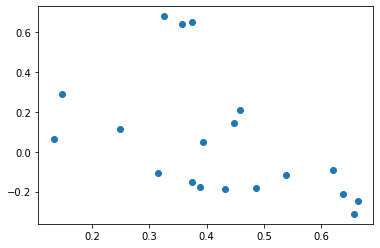

In [5]:
with open("temp.txt", "r") as selected_contexts_file:
  file_content = selected_contexts_file.read()
  file_content_splitted = file_content.split("==========")

plot_corpus(file_content_splitted)


In [6]:
classes = classificar(file_content_splitted)

classificar?(y/n) n


In [7]:
classes = ['compra', 'convocação', 'reparo'
           , 'registro', 'reparo', 'reparo', 'convocação', 'registro', 'convocação', 'convocação', 'reparo', 'convocação', 'convocação', 'registro', 'convocação', 'licitação fracassada', 'reparo', 'registro', 'compra']

data2D = get_2d_representation(file_content_splitted)

df = pd.DataFrame({"classes":classes,
                   "text":file_content_splitted,
                   "d1": data2D[:,0],
                   "d2": data2D[:,1]})


     Tipos possíveis:
     1 - compra (de ventilador ou acessório)
     2 - reparo/manutenção (de ventilador ou acessório)
     3 - aviso de convocação para licitação
     4 - registro de preços
     5 - licitação fracassada
     6 - outro    
    


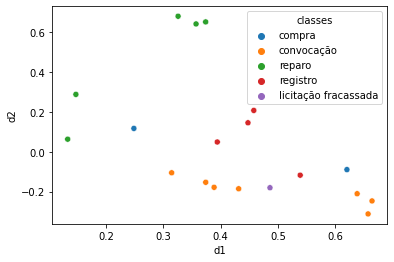

In [8]:
plot_corpus_with_classes(df, "ventilador_raw.png")

there are 19 matches




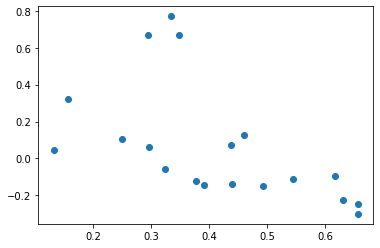

In [89]:
dir = '../data/ventilado_pulmonar_linearizado//'
keyword = "ventilador pulmonar"

! grep -r -i -C 10 --group-separator="==========" "$keyword" "$dir" > temp.txt
! sed -i 's_.*txt__g' temp.txt

with open("temp.txt", "r") as selected_contexts_file:
  file_content = selected_contexts_file.read()
  file_content_splitted = file_content.split("==========")

plot_corpus(file_content_splitted)

In [9]:
classes = classificar(file_content_splitted)

classificar?(y/n) n


['compra', 'aviso de licitação', 'reparo', 'compra', 'reparo', 'reparo', 'aviso de licitação', 'outro', 'registro de preços', 'registro de preços', 'reparo', 'aviso de licitação', 'aviso de licitação', 'registro de preços', 'aviso de licitação', 'licitação fracassada', 'reparo', 'registro de preços', 'compra']

     Tipos possíveis:
     1 - compra (de ventilador ou acessório)
     2 - reparo/manutenção (de ventilador ou acessório)
     3 - aviso de convocação para licitação
     4 - registro de preços
     5 - licitação fracassada
     6 - outro    
    


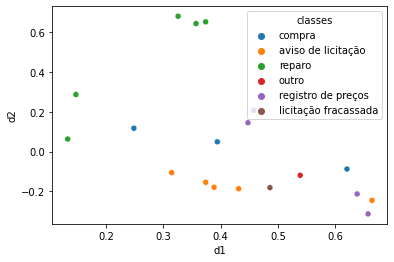

In [11]:
print(classes)
classes = ['1', '3', '2', '1', '2', '2', '3', '6', '4', '4', '2', '3', '3', '4', '3', '5', '2', '4', '1']
classes = descrever_tipo(classes)
data2D = get_2d_representation(file_content_splitted)

df = pd.DataFrame({"classes":classes,
                   "text":file_content_splitted,
                   "d1": data2D[:,0],
                   "d2": data2D[:,1]})
plot_corpus_with_classes(df, "ventilador_linearized.png")